In [1]:
# Forecast the CocaCola prices and Airlines Passengers data set.
# Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model.
# Finally which model you will use for Forecasting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime,time
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt, ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.formula.api as smf

# Q1)

In [3]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df1=df.copy()

In [4]:
df1.shape

(42, 2)

In [5]:
df1.size

84

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [8]:
df1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [9]:
df1.duplicated().any()

False

In [10]:
temp=df1.Quarter.str.replace(r'(Q\d)_(\d+)',r'19\2-\1')

<ipython-input-10-d69967d02060>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp=df1.Quarter.str.replace(r'(Q\d)_(\d+)',r'19\2-\1')


In [11]:
df1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')
df1

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987
5,Q2_87,2104.411995,Apr-1987
6,Q3_87,2014.362999,Jul-1987
7,Q4_87,1991.746998,Oct-1987
8,Q1_88,1869.049999,Jan-1988
9,Q2_88,2313.631996,Apr-1988


In [12]:
df1=df1.drop(['Quarter'],axis=1)
df1

,Sales,quater
0,1734.827000,Jan-1986
1,2244.960999,Apr-1986
2,2533.804993,Jul-1986
3,2154.962997,Oct-1986
4,1547.818996,Jan-1987
5,2104.411995,Apr-1987
6,2014.362999,Jul-1987
7,1991.746998,Oct-1987
8,1869.049999,Jan-1988
9,2313.631996,Apr-1988


In [13]:
df1.reset_index(inplace=True)

In [14]:
df1['quater']=pd.to_datetime(df1['quater'])

In [15]:
df1=df1.set_index('quater')
df1

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996
1987-04-01,5,2104.411995
1987-07-01,6,2014.362999
1987-10-01,7,1991.746998
1988-01-01,8,1869.049999


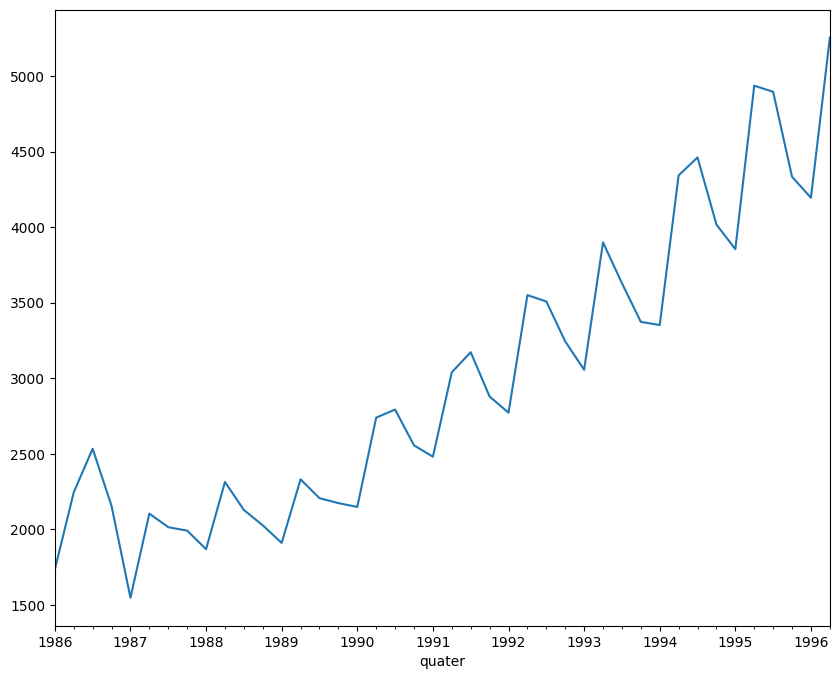

In [16]:
df1['Sales'].plot(figsize=(10,8))
plt.show()

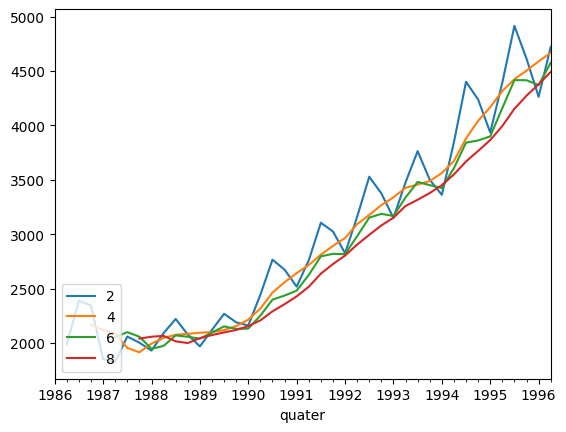

In [17]:
for i in range(2,10,2):
    df1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

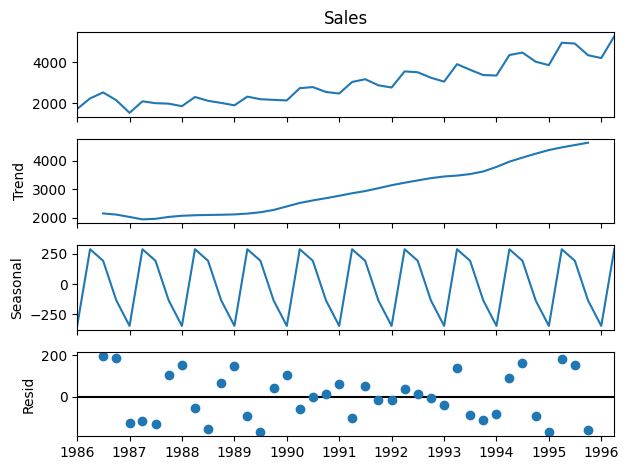

In [18]:
ts_add = seasonal_decompose(df1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

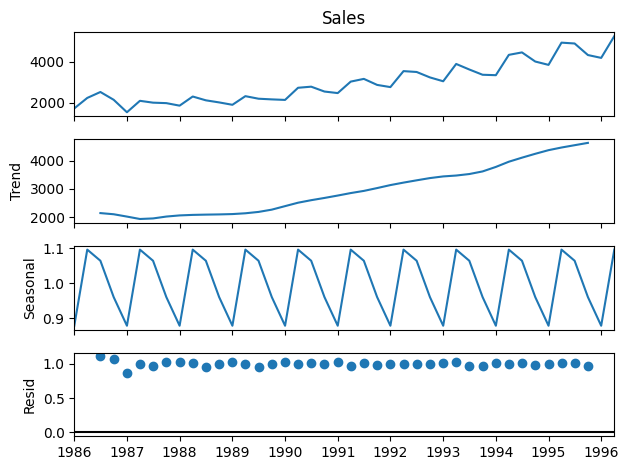

In [19]:
ts_mul = seasonal_decompose(df1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

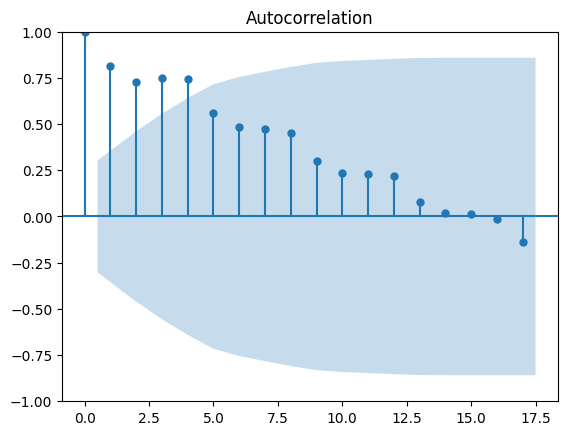

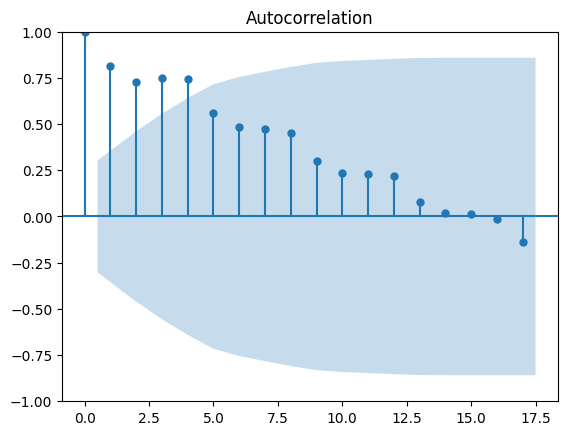

In [20]:
tsa_plots.plot_acf(df1.Sales)

### Building Time series forecasting with ARIMA

In [21]:
X=df1['Sales'].values

In [22]:
size=int(len(X)*0.66)

In [23]:
train,test=X[0:size],X[size:len(X)]

In [24]:
model=ARIMA(train,order=(5,1,0))

In [25]:
model_fit=model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Wed, 03 Jan 2024   AIC                            360.163
Time:                        12:17:54   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

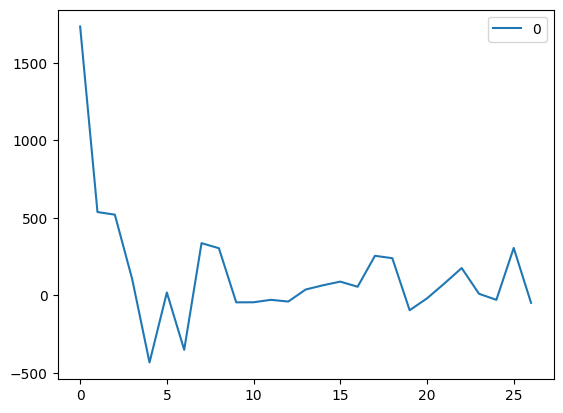

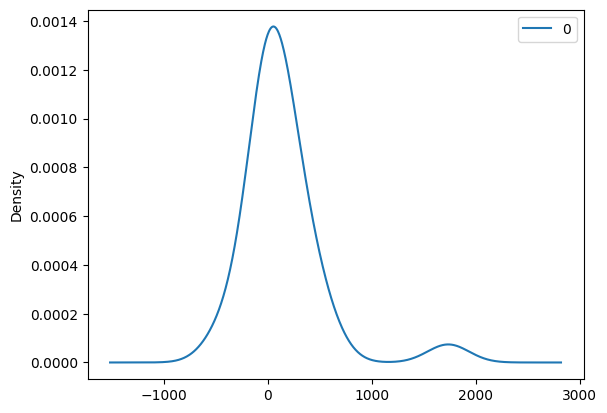

                 0
count    27.000000
mean    137.791854
std     385.970462
min    -433.659591
25%     -34.938856
50%      55.067398
75%     247.080157
max    1734.827000


In [26]:
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

### Rolling Forecast ARIMA Model

In [27]:
history=[x for x in train]

In [28]:
predictions=list()

In [29]:
for t in range(len(test)):
    model=ARIMA(history, order=(5,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)

    print('predicted=%f, expected=%f' % (yhat,obs))

predicted=3130.132560, expected=3243.859993
predicted=3167.315971, expected=3056.000000
predicted=3717.472606, expected=3899.000000
predicted=3775.837500, expected=3629.000000
predicted=3332.744953, expected=3373.000000
predicted=3258.575374, expected=3352.000000
predicted=4081.006044, expected=4342.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=3955.784129, expected=4461.000000
predicted=4146.277764, expected=4017.000000
predicted=3958.436605, expected=3854.000000
predicted=4701.652928, expected=4936.000000
predicted=4990.071243, expected=4895.000000
predicted=4390.352764, expected=4333.000000
predicted=4190.945470, expected=4194.000000
predicted=5177.006981, expected=5253.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


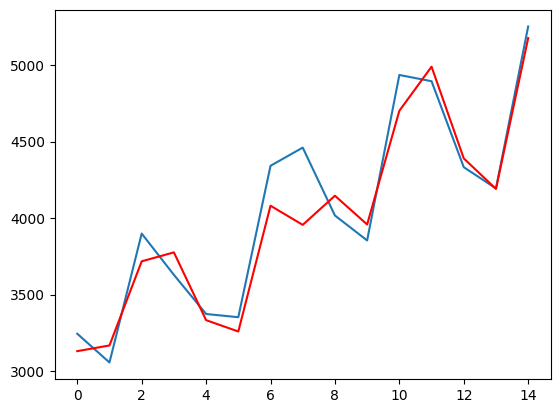

In [30]:
plt.plot(test)
plt.plot(predictions,color='red')
plt.show()

### Comparing multiple models

In [31]:
df=pd.get_dummies(df,columns=['Quarter'])

In [32]:
df.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']
df

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2104.411995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2014.362999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1991.746998,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,1869.049999,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2313.631996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
t=np.arange(1,43)

In [34]:
df['t']=t

In [35]:
df['t_sq']=df['t']*df['t']

In [36]:
log_sales=np.log(df['Sales'])

In [37]:
df['log_sales']=log_sales
df

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602
5,2104.411995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,36,7.651791
6,2014.362999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,49,7.608058
7,1991.746998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,64,7.596767
8,1869.049999,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,81,7.533186
9,2313.631996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,100,7.746574


In [38]:
train,test=np.split(df,[int(.67*len(df))])

In [39]:
linear= smf.ols('Sales ~ t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin

580.1224130918635

In [40]:
quad=smf.ols('Sales~t+t_sq',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975037553

In [41]:
expo=smf.ols('log_sales~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900199

In [42]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188209186954

In [43]:
addlinear=smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372298

In [44]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.1144436053725

In [45]:
mulsea=smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.9194407954424

In [46]:
mullin= smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.6879119332325

In [47]:
mul_quad= smf.ols('log_sales~t+t_sq+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.56194673477

### Conclusion

In [48]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemul])}

In [49]:
rmse=pd.DataFrame(output)

### Additive seasonality with quadratic trend has the best RMSE value

# Q2)

In [50]:
df2=pd.read_excel('Airlines+Data.xlsx')
df2

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [51]:
df2.shape

(96, 2)

In [52]:
df2.size

192

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [54]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [55]:
df2.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [56]:
df2.duplicated().any()

False

<Axes: xlabel='Month', ylabel='Passengers'>

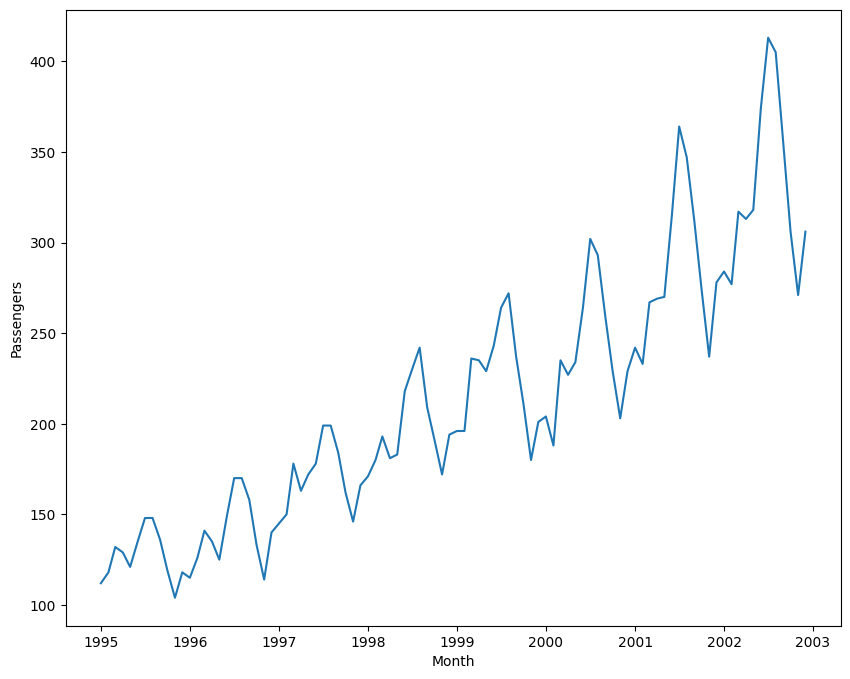

In [57]:
# Plotting
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x='Month',y='Passengers',data=df2)

In [58]:
!pip install statsmodels

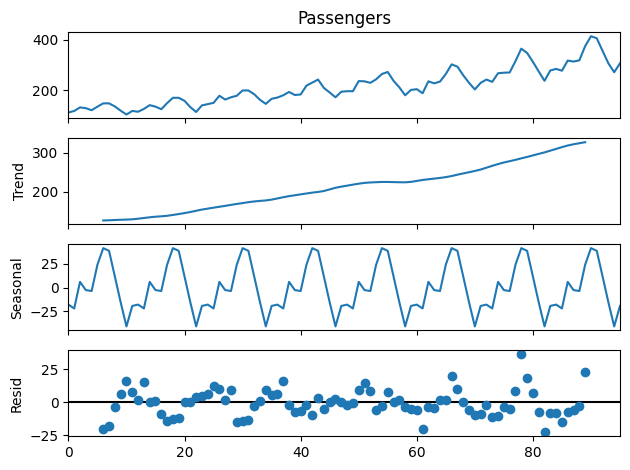

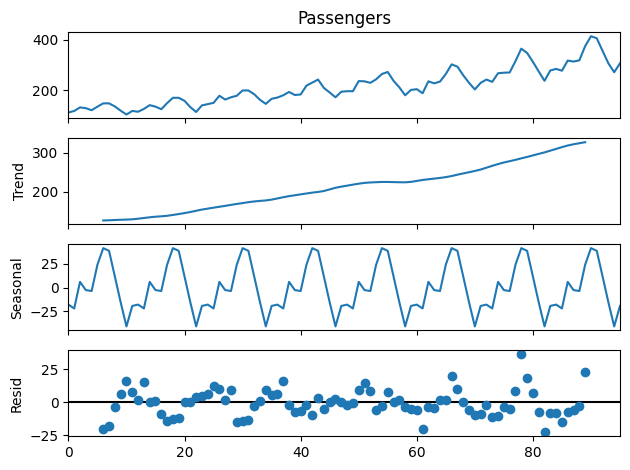

In [59]:
seasonal_ts_add=seasonal_decompose(df2['Passengers'],model="additive",period=12)
seasonal_ts_add.plot()

In [60]:
df2['Month']=pd.to_datetime(df2['Month'])
df2['Months']=df2['Month'].dt.strftime('%b')
df2

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May
...,...,...,...
91,2002-08-01,405,Aug
92,2002-09-01,355,Sep
93,2002-10-01,306,Oct
94,2002-11-01,271,Nov


<Axes: >

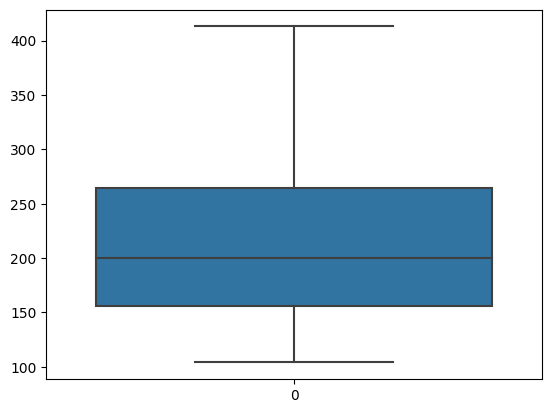

In [61]:
sns.boxplot(data=df2['Passengers'])


In [62]:
month_dummies=pd.DataFrame(pd.get_dummies(df2['Months']))
df=pd.concat([df2,month_dummies],axis = 1)
df

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0


In [63]:
df['t'] = np.arange(1,97)
df['t_squared'] = df['t']*df['t']
df['log_passengers']=np.log(df['Passengers'])
df


,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [64]:
train=df.head(75)
test=df.tail(25)


In [65]:
linear_model=smf.ols('Passengers~t',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  51.83809749584509


In [66]:
exp=smf.ols('log_passengers~t',data=train).fit()
pred_exp=pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
print("RMSE Exponential: ",rmse_exp)

RMSE Exponential:  42.77525975019796


In [67]:
quad=smf.ols('Passengers~t+t_squared',data=train).fit()
pred_quad=pd.Series(quad.predict(test[["t","t_squared"]]))
rmse_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2))
print("RMSE Quadratic: ",rmse_quad)

RMSE Quadratic:  54.031406456252654


In [68]:
add_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)


RMSE Additive seasonality:  123.02763788084235


In [69]:
add_sea_quad=smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea_quad=pd.Series(add_sea_quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 36.536274445472245


In [70]:
mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test))
rmse_mul_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_mul_sea)

RMSE Multiplicative Seasonality: 128.1662281759615


In [71]:
mul_add_sea=smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mul_add_sea=pd.Series(mul_add_sea.predict(test))
rmse_mul_add_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_mul_add_sea )

RMSE Multiplicative Additive Seasonality: 11.565825437686215


In [72]:
df={"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mul_sea","rmse_mul_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(df)
table_rmse


,MODEL,RMSE_Values
0,rmse_linear,51.838097
1,rmse_exp,42.775260
2,rmse_quad,54.031406
3,rmse_add_sea,123.027638
4,rmse_add_sea_quad,36.536274
5,rmse_mul_sea,128.166228
6,rmse_mul_add_sea,11.565825


In [73]:
df=[['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast= pd.DataFrame(df,columns=['Date','Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [74]:
# Creating dummies, T and T-Squared columns
dummies=pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1=pd.concat([forecast,dummies],axis=1)
forecast1['t'] = np.arange(1,13)
forecast1['t_squared']=forecast1['t']*forecast1['t']
print("\nAfter Dummy, T and T-Square\n\n",forecast1)



After Dummy, T and T-Square

           Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0   2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1   2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2   2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3   2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4    2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   
5   2003-06-01    Jun    0    0    0    0    0    0    1    0    0    0    0   
6   2003-07-01    Jul    0    0    0    0    0    1    0    0    0    0    0   
7   2003-08-01    Aug    0    1    0    0    0    0    0    0    0    0    0   
8   2003-09-01    Sep    0    0    0    0    0    0    0    0    0    0    0   
9   2003-10-01    Oct    0    0    0    0    0    0    0    0    0    0    1   
10  2003-11-01    Nov    0    0    0    0    0    0    0    0    0    1    0   
11  2003-

In [ ]:
# Forecasting using Multiplicative Additive Seasonality Model
model_full=smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=df).fit()
pred_new=pd.Series(model_full.predict(forecast1))
forecast1['forecasted_log']=pd.Series(pred_new)
forecast1['forecasted_passengers']=np.exp(forecast1['forecasted_log'])

In [ ]:
# Final Prediction for next 12 months
final_predict=forecast1.loc[:,['Date','forecasted_passengers']]
final_predict